In [0]:
import numpy as np
import os
import pandas as pd
import io
import matplotlib as plt

In [0]:
data = pd.read_csv("expr_data_10446.csv")

In [0]:
label = pd.read_csv("expr_all_labels.csv")

In [0]:
data.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-OR-A5J1-01,16.3305,0.0000,17.2911,182.3919,54.7550,10373.6984,190.6820,0.0000,0.0,2225.2642,0.0000,1266.0903,0.0000,0.0,0.0,0.0000,121.0375,1327.0893,868.8761,2636.4073,1.4409,299.7118,904.4188,3520.6532,1467.3391,101.3449,946.2056,1256.4841,27.8578,1580.6916,70.6052,46.2488,0.0000,0.4803,42.2671,319.4044,804.5149,729.5869,2.4015,...,2180.1153,1636.3641,29.7791,256.0038,0.0000,4.8751,206.0519,49.4524,154.6590,0.9606,13.4486,327.6225,36.9837,3.3622,373.6792,107.1085,0.4803,20.6532,0.0000,370.7973,0.0,49.9520,152.7378,280.9798,135.4467,722.7474,148.4150,253.6023,183.9577,146.9741,20.6532,351.5850,1050.9126,0.4803,648.4150,1841.0183,1157.5408,596.0615,715.6580,0.9606
1,TCGA-OR-A5J2-01,9.5987,0.0000,5.6368,239.1584,0.0000,9844.9128,198.8994,0.0000,0.0,1509.4613,0.4026,981.6129,0.0000,0.0,0.0,1.2079,31.0025,1271.1041,1627.0294,1931.0153,0.0000,408.6658,361.5621,5470.9417,820.5366,249.2282,183.1968,1055.6969,1081.4169,1477.6535,9.6631,76.4031,0.0000,0.8053,12.8842,1071.7981,992.4839,1097.9731,6.8447,...,2553.4819,788.3181,84.1498,104.6839,0.4026,8.9988,218.2257,27.3467,2016.7756,12.0789,70.4603,193.6330,114.3470,39.4578,306.8044,92.2024,0.8053,38.6525,1.2079,435.6461,0.0,117.1654,502.4827,868.0711,175.9495,240.5596,106.2944,270.1650,264.1255,438.4645,57.1735,279.0229,2979.8675,31.4052,1166.0176,3059.9909,1895.9865,801.6371,581.8009,0.4026
2,TCGA-OR-A5J3-01,20.7377,0.5925,8.8876,138.8831,1.7775,7201.8368,75.2481,2.3700,0.0,1259.6652,0.0000,5182.0471,0.0000,0.0,0.0,107.2434,39.1053,1090.8014,1158.3469,2408.5321,0.0000,291.5124,451.4887,4042.6603,1048.1410,206.1917,303.9550,895.8673,93.0233,943.2677,36.7353,28.4936,5.3325,164.1238,31.9953,896.4598,3065.0274,4815.2866,7.1101,...,864.4645,673.6187,79.9881,193.7491,1.1850,8.5558,194.3416,2.9625,2597.5411,20.7377,55.6955,284.8526,117.3160,8.8876,239.3719,170.6414,0.0000,110.7984,2.3700,284.4023,0.0,67.5455,591.3198,647.0153,242.9270,229.9274,140.4236,297.4374,90.6532,190.1940,39.6978,495.3340,914.8274,0.5925,806.3991,2655.6066,1482.4470,437.2686,126.7960,0.0000
3,TCGA-OR-A5J5-01,1696.6615,1.5492,6.1967,63.9349,49.5740,2939.0395,374.9032,0.7746,0.0,2993.8033,3.0984,967.4671,0.0000,0.0,0.0,149.4965,98.3734,925.6390,646.7854,1350.8908,1.5492,533.6871,439.1944,2738.9620,590.2401,364.8335,644.4617,542.2153,450.9760,623.5476,30.2091,165.7707,0.7746,11.6189,140.2014,310.6119,3364.0589,4017.8156,0.0000,...,1803.2533,1076.6770,13.9427,472.5019,5.4222,7.1418,154.1441,16.2665,3464.7560,83.6561,57.3199,452.3625,240.1239,18.5902,546.0883,151.8203,0.0000,155.6933,2.3238,358.6367,0.0,118.5128,333.0751,566.2277,525.9489,230.4957,84.4307,146.3981,260.2634,840.4338,17.8156,206.0418,890.7823,11.6189,553.8342,2367.9318,1140.2014,512.7808,855.1510,0.0000
4,TCGA-OR-A5J6-01,600.1618,0.0000,4.4709,237.3520,1.1177,9586.9630,1556.4159,0.5589,0.0,1186.4528,0.0000,1479.2937,1.6766,0.0,0.0,317.4306,19.5600,1027.7375,1238.9853,3605.1845,0.0000,414.1016,846.1090,2996.5896,1013.7660,271.6044,189.4524,1127.2139,44.1497,584.5641,17.3246,54.6618,0.0000,0.0000,68.7394,800.2828,402.3768,863.9924,2.7943,...,1110.4482,998.6154,81.0342,282.2226,0.0000,191.0899,209.0124,66.4984,1878.3173,7.8240,32.9725,307.5780,116.2422,9.5006,225.2192,201.1884,0.0000,32.4137,0.5589,379.4637,0.0,156.4799,164.8627,636.5378,204.5415,585.2403,139.7142,384.4934,64.2685,63.1508,12.8537,117.9188,894.7296,7.8240,795.8119,708.0714,796.3708,475.5870,288.3701,0.0000


In [0]:
dataVal = data.drop("Unnamed: 0", 1)
dataVal.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,16.3305,0.0000,17.2911,182.3919,54.7550,10373.6984,190.6820,0.0000,0.0,2225.2642,0.0000,1266.0903,0.0000,0.0,0.0,0.0000,121.0375,1327.0893,868.8761,2636.4073,1.4409,299.7118,904.4188,3520.6532,1467.3391,101.3449,946.2056,1256.4841,27.8578,1580.6916,70.6052,46.2488,0.0000,0.4803,42.2671,319.4044,804.5149,729.5869,2.4015,2036.9837,...,2180.1153,1636.3641,29.7791,256.0038,0.0000,4.8751,206.0519,49.4524,154.6590,0.9606,13.4486,327.6225,36.9837,3.3622,373.6792,107.1085,0.4803,20.6532,0.0000,370.7973,0.0,49.9520,152.7378,280.9798,135.4467,722.7474,148.4150,253.6023,183.9577,146.9741,20.6532,351.5850,1050.9126,0.4803,648.4150,1841.0183,1157.5408,596.0615,715.6580,0.9606
1,9.5987,0.0000,5.6368,239.1584,0.0000,9844.9128,198.8994,0.0000,0.0,1509.4613,0.4026,981.6129,0.0000,0.0,0.0,1.2079,31.0025,1271.1041,1627.0294,1931.0153,0.0000,408.6658,361.5621,5470.9417,820.5366,249.2282,183.1968,1055.6969,1081.4169,1477.6535,9.6631,76.4031,0.0000,0.8053,12.8842,1071.7981,992.4839,1097.9731,6.8447,268.5545,...,2553.4819,788.3181,84.1498,104.6839,0.4026,8.9988,218.2257,27.3467,2016.7756,12.0789,70.4603,193.6330,114.3470,39.4578,306.8044,92.2024,0.8053,38.6525,1.2079,435.6461,0.0,117.1654,502.4827,868.0711,175.9495,240.5596,106.2944,270.1650,264.1255,438.4645,57.1735,279.0229,2979.8675,31.4052,1166.0176,3059.9909,1895.9865,801.6371,581.8009,0.4026
2,20.7377,0.5925,8.8876,138.8831,1.7775,7201.8368,75.2481,2.3700,0.0,1259.6652,0.0000,5182.0471,0.0000,0.0,0.0,107.2434,39.1053,1090.8014,1158.3469,2408.5321,0.0000,291.5124,451.4887,4042.6603,1048.1410,206.1917,303.9550,895.8673,93.0233,943.2677,36.7353,28.4936,5.3325,164.1238,31.9953,896.4598,3065.0274,4815.2866,7.1101,878.6846,...,864.4645,673.6187,79.9881,193.7491,1.1850,8.5558,194.3416,2.9625,2597.5411,20.7377,55.6955,284.8526,117.3160,8.8876,239.3719,170.6414,0.0000,110.7984,2.3700,284.4023,0.0,67.5455,591.3198,647.0153,242.9270,229.9274,140.4236,297.4374,90.6532,190.1940,39.6978,495.3340,914.8274,0.5925,806.3991,2655.6066,1482.4470,437.2686,126.7960,0.0000
3,1696.6615,1.5492,6.1967,63.9349,49.5740,2939.0395,374.9032,0.7746,0.0,2993.8033,3.0984,967.4671,0.0000,0.0,0.0,149.4965,98.3734,925.6390,646.7854,1350.8908,1.5492,533.6871,439.1944,2738.9620,590.2401,364.8335,644.4617,542.2153,450.9760,623.5476,30.2091,165.7707,0.7746,11.6189,140.2014,310.6119,3364.0589,4017.8156,0.0000,719.5972,...,1803.2533,1076.6770,13.9427,472.5019,5.4222,7.1418,154.1441,16.2665,3464.7560,83.6561,57.3199,452.3625,240.1239,18.5902,546.0883,151.8203,0.0000,155.6933,2.3238,358.6367,0.0,118.5128,333.0751,566.2277,525.9489,230.4957,84.4307,146.3981,260.2634,840.4338,17.8156,206.0418,890.7823,11.6189,553.8342,2367.9318,1140.2014,512.7808,855.1510,0.0000
4,600.1618,0.0000,4.4709,237.3520,1.1177,9586.9630,1556.4159,0.5589,0.0,1186.4528,0.0000,1479.2937,1.6766,0.0,0.0,317.4306,19.5600,1027.7375,1238.9853,3605.1845,0.0000,414.1016,846.1090,2996.5896,1013.7660,271.6044,189.4524,1127.2139,44.1497,584.5641,17.3246,54.6618,0.0000,0.0000,68.7394,800.2828,402.3768,863.9924,2.7943,908.1421,...,1110.4482,998.6154,81.0342,282.2226,0.0000,191.0899,209.0124,66.4984,1878.3173,7.8240,32.9725,307.5780,116.2422,9.5006,225.2192,201.1884,0.0000,32.4137,0.5589,379.4637,0.0,156.4799,164.8627,636.5378,204.5415,585.2403,139.7142,384.4934,64.2685,63.1508,12.8537,117.9188,894.7296,7.8240,795.8119,708.0714,796.3708,475.5870,288.3701,0.0000


In [0]:
label.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs
0,0,TCGA-OR-A5J1-01,0,ACC,TCGA-OR-A5J1-01A-11R-A29S-07
1,1,TCGA-OR-A5J2-01,0,ACC,TCGA-OR-A5J2-01A-11R-A29S-07
2,2,TCGA-OR-A5J3-01,0,ACC,TCGA-OR-A5J3-01A-11R-A29S-07
3,3,TCGA-OR-A5J5-01,0,ACC,TCGA-OR-A5J5-01A-11R-A29S-07
4,4,TCGA-OR-A5J6-01,0,ACC,TCGA-OR-A5J6-01A-31R-A29S-07


In [0]:
data.describe()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
count,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,...,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000
mean,3115.779952,130.416813,58.069392,131.288171,1182.247744,19885.375264,704.589579,8.048727,0.792854,814.935124,8.628611,905.550111,6.794308,2.361428,0.360666,565.223968,132.784981,1146.743272,1183.331029,2487.980482,1.398265,518.394316,587.515324,3643.800034,953.566292,260.402527,505.504443,1399.700586,287.136466,2292.126759,35.478182,93.468688,309.604612,239.933172,26.570437,1403.074225,2050.027465,2157.444164,139.232484,434.684204,...,961.437933,1300.721304,73.420275,246.570514,1.299284,44.453821,169.125321,116.898310,1078.159936,13.708944,62.429678,229.973417,119.219620,28.695799,472.593175,231.995766,4.789799,80.261535,2.316261,312.334810,0.391204,119.372913,516.004094,197.878991,483.030079,290.104100,173.387543,428.871733,417.901158,689.236483,56.848415,429.183384,1196.716574,45.944189,926.083411,4728.861433,1302.857615,752.839138,157.866817,6.343731
std,16959.700479,455.901898,321.078013,221.756679,5181.592001,34327.662042,838.997150,65.314836,4.501597,304.051753,35.830367,675.005846,55.054938,70.338456,9.041542,2522.815102,188.306022,533.700289,813.258361,797.294272,4.140086,291.900714,320.218550,1775.470854,511.183112,128.143487,751.168764,657.895313,669.796977,4407.964798,104.330587,57.493842,788.278161,687.304415,61.038299,1170.806508,2895.782123,3872.379741,729.878686,395.353841,...,421.653069,530.258101,51.245655,128.883574,6.523110,54.737810,104.709386,79.143139,931.465372,30.146619,33.935514,100.238982,56.422967,39.500096,195.831777,124.743736,22.685544,44.513623,9.647475,130.792187,1.868541,58.500580,473.731355,192.815789,299.504454,175.519031,74.732186,174.500316,279.825723,612.755216,32.039015,246.206145,532.285856,76.059571,443.581511,2965.006384,738.206032,350.896190,495.782255,34.770927
min,0.947900,0.000000,0.000000,2.309700,0.000000,0.000000,0.000000,0.000000,0.000000,79.928600,0.000000,9.009000,0.000000,0.000000,0.000000,0.000000,0.000000,71.861500,102.033900,219.119200,0.000000,54.950900,54.237300,383.116900,85.222100,19.039000,0.000000,181.143300,0.869000,2.070400,0.000000,0.000000,0.000000,0.000000,0.000000,29.934500,16.255300,1.847300,0.000000,2.409800,...,188.981000,147.842900,0.000000,28.200500,0.000000,0.000000,0.000000,0.806200,7.333700,0.000000,1.829500,7.761800,23.550400,0.000000,25.825000,18.083900,0.000000,0.000000,0.000000,37.106800,0.000000,6.904000,19.569700,0.000000,5.566700,14.761300,8.608300,50.215200,31.294700,8.417800,0.000000,0.634500,216.681800,0.000000,84.315500,139.634800,131.039800,101.265800,0.000000,0.00000

From this section till the next, I'll be joining the data and label dataframes and filtering out just the lung cancer cells. This is under the assumption that 'LUAD' and 'LUSC' are representative of lung cancer cells.

In [0]:
data = data.rename(columns={"Unnamed: 0": "sample_IDs"})

In [0]:
data.head()

,sample_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-OR-A5J1-01,16.3305,0.0000,17.2911,182.3919,54.7550,10373.6984,190.6820,0.0000,0.0,2225.2642,0.0000,1266.0903,0.0000,0.0,0.0,0.0000,121.0375,1327.0893,868.8761,2636.4073,1.4409,299.7118,904.4188,3520.6532,1467.3391,101.3449,946.2056,1256.4841,27.8578,1580.6916,70.6052,46.2488,0.0000,0.4803,42.2671,319.4044,804.5149,729.5869,2.4015,...,2180.1153,1636.3641,29.7791,256.0038,0.0000,4.8751,206.0519,49.4524,154.6590,0.9606,13.4486,327.6225,36.9837,3.3622,373.6792,107.1085,0.4803,20.6532,0.0000,370.7973,0.0,49.9520,152.7378,280.9798,135.4467,722.7474,148.4150,253.6023,183.9577,146.9741,20.6532,351.5850,1050.9126,0.4803,648.4150,1841.0183,1157.5408,596.0615,715.6580,0.9606
1,TCGA-OR-A5J2-01,9.5987,0.0000,5.6368,239.1584,0.0000,9844.9128,198.8994,0.0000,0.0,1509.4613,0.4026,981.6129,0.0000,0.0,0.0,1.2079,31.0025,1271.1041,1627.0294,1931.0153,0.0000,408.6658,361.5621,5470.9417,820.5366,249.2282,183.1968,1055.6969,1081.4169,1477.6535,9.6631,76.4031,0.0000,0.8053,12.8842,1071.7981,992.4839,1097.9731,6.8447,...,2553.4819,788.3181,84.1498,104.6839,0.4026,8.9988,218.2257,27.3467,2016.7756,12.0789,70.4603,193.6330,114.3470,39.4578,306.8044,92.2024,0.8053,38.6525,1.2079,435.6461,0.0,117.1654,502.4827,868.0711,175.9495,240.5596,106.2944,270.1650,264.1255,438.4645,57.1735,279.0229,2979.8675,31.4052,1166.0176,3059.9909,1895.9865,801.6371,581.8009,0.4026
2,TCGA-OR-A5J3-01,20.7377,0.5925,8.8876,138.8831,1.7775,7201.8368,75.2481,2.3700,0.0,1259.6652,0.0000,5182.0471,0.0000,0.0,0.0,107.2434,39.1053,1090.8014,1158.3469,2408.5321,0.0000,291.5124,451.4887,4042.6603,1048.1410,206.1917,303.9550,895.8673,93.0233,943.2677,36.7353,28.4936,5.3325,164.1238,31.9953,896.4598,3065.0274,4815.2866,7.1101,...,864.4645,673.6187,79.9881,193.7491,1.1850,8.5558,194.3416,2.9625,2597.5411,20.7377,55.6955,284.8526,117.3160,8.8876,239.3719,170.6414,0.0000,110.7984,2.3700,284.4023,0.0,67.5455,591.3198,647.0153,242.9270,229.9274,140.4236,297.4374,90.6532,190.1940,39.6978,495.3340,914.8274,0.5925,806.3991,2655.6066,1482.4470,437.2686,126.7960,0.0000
3,TCGA-OR-A5J5-01,1696.6615,1.5492,6.1967,63.9349,49.5740,2939.0395,374.9032,0.7746,0.0,2993.8033,3.0984,967.4671,0.0000,0.0,0.0,149.4965,98.3734,925.6390,646.7854,1350.8908,1.5492,533.6871,439.1944,2738.9620,590.2401,364.8335,644.4617,542.2153,450.9760,623.5476,30.2091,165.7707,0.7746,11.6189,140.2014,310.6119,3364.0589,4017.8156,0.0000,...,1803.2533,1076.6770,13.9427,472.5019,5.4222,7.1418,154.1441,16.2665,3464.7560,83.6561,57.3199,452.3625,240.1239,18.5902,546.0883,151.8203,0.0000,155.6933,2.3238,358.6367,0.0,118.5128,333.0751,566.2277,525.9489,230.4957,84.4307,146.3981,260.2634,840.4338,17.8156,206.0418,890.7823,11.6189,553.8342,2367.9318,1140.2014,512.7808,855.1510,0.0000
4,TCGA-OR-A5J6-01,600.1618,0.0000,4.4709,237.3520,1.1177,9586.9630,1556.4159,0.5589,0.0,1186.4528,0.0000,1479.2937,1.6766,0.0,0.0,317.4306,19.5600,1027.7375,1238.9853,3605.1845,0.0000,414.1016,846.1090,2996.5896,1013.7660,271.6044,189.4524,1127.2139,44.1497,584.5641,17.3246,54.6618,0.0000,0.0000,68.7394,800.2828,402.3768,863.9924,2.7943,...,1110.4482,998.6154,81.0342,282.2226,0.0000,191.0899,209.0124,66.4984,1878.3173,7.8240,32.9725,307.5780,116.2422,9.5006,225.2192,201.1884,0.0000,32.4137,0.5589,379.4637,0.0,156.4799,164.8627,636.5378,204.5415,585.2403,139.7142,384.4934,64.2685,63.1508,12.8537,117.9188,894.7296,7.8240,795.8119,708.0714,796.3708,475.5870,288.3701,0.0000


In [0]:
label.dtypes

Unnamed: 0          int64
sample_IDs         object
labels              int64
fromTissu          object
sample_orig_IDs    object
dtype: object

In [0]:
label["sample_IDs"]

0        TCGA-OR-A5J1-01
1        TCGA-OR-A5J2-01
2        TCGA-OR-A5J3-01
3        TCGA-OR-A5J5-01
4        TCGA-OR-A5J6-01
              ...       
10441    TCGA-YZ-A980-01
10442    TCGA-YZ-A982-01
10443    TCGA-YZ-A983-01
10444    TCGA-YZ-A984-01
10445    TCGA-YZ-A985-01
Name: sample_IDs, Length: 10446, dtype: object

In [0]:
data.dtypes

sample_IDs     object
A1BG          float64
A1CF          float64
A2BP1         float64
A2LD1         float64
               ...   
ZYX           float64
ZZEF1         float64
ZZZ3          float64
psiTPTE22     float64
tAKR          float64
Length: 20502, dtype: object

In [0]:
data.keys

<bound method NDFrame.keys of            sample_IDs       A1BG    A1CF  ...      ZZZ3  psiTPTE22    tAKR
0     TCGA-OR-A5J1-01    16.3305  0.0000  ...  596.0615   715.6580  0.9606
1     TCGA-OR-A5J2-01     9.5987  0.0000  ...  801.6371   581.8009  0.4026
2     TCGA-OR-A5J3-01    20.7377  0.5925  ...  437.2686   126.7960  0.0000
3     TCGA-OR-A5J5-01  1696.6615  1.5492  ...  512.7808   855.1510  0.0000
4     TCGA-OR-A5J6-01   600.1618  0.0000  ...  475.5870   288.3701  0.0000
...               ...        ...     ...  ...       ...        ...     ...
7372  TCGA-W2-A7H5-01   443.3227  0.4097  ...  511.3182    13.5204  0.0000
7373  TCGA-W2-A7H7-01   548.3728  0.6072  ...  243.4730    48.5732  0.0000
7374  TCGA-W2-A7HA-01   317.4506  0.8068  ...  444.9375    22.5898  0.0000
7375  TCGA-W2-A7HB-01   218.5138  0.0000  ...  515.9473    18.2255  0.3314
7376  TCGA-W2-A7HC-01   266.5062  0.0000  ...       NaN        NaN     NaN

[7377 rows x 20502 columns]>

In [0]:
joined = pd.merge(label, data, how='inner', left_on='sample_IDs', right_on='sample_IDs')

In [0]:
joined.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,TCGA-OR-A5J1-01,0,ACC,TCGA-OR-A5J1-01A-11R-A29S-07,16.3305,0.0000,17.2911,182.3919,54.7550,10373.6984,190.6820,0.0000,0.0,2225.2642,0.0000,1266.0903,0.0000,0.0,0.0,0.0000,121.0375,1327.0893,868.8761,2636.4073,1.4409,299.7118,904.4188,3520.6532,1467.3391,101.3449,946.2056,1256.4841,27.8578,1580.6916,70.6052,46.2488,0.0000,0.4803,42.2671,...,2180.1153,1636.3641,29.7791,256.0038,0.0000,4.8751,206.0519,49.4524,154.6590,0.9606,13.4486,327.6225,36.9837,3.3622,373.6792,107.1085,0.4803,20.6532,0.0000,370.7973,0.0,49.9520,152.7378,280.9798,135.4467,722.7474,148.4150,253.6023,183.9577,146.9741,20.6532,351.5850,1050.9126,0.4803,648.4150,1841.0183,1157.5408,596.0615,715.6580,0.9606
1,1,TCGA-OR-A5J2-01,0,ACC,TCGA-OR-A5J2-01A-11R-A29S-07,9.5987,0.0000,5.6368,239.1584,0.0000,9844.9128,198.8994,0.0000,0.0,1509.4613,0.4026,981.6129,0.0000,0.0,0.0,1.2079,31.0025,1271.1041,1627.0294,1931.0153,0.0000,408.6658,361.5621,5470.9417,820.5366,249.2282,183.1968,1055.6969,1081.4169,1477.6535,9.6631,76.4031,0.0000,0.8053,12.8842,...,2553.4819,788.3181,84.1498,104.6839,0.4026,8.9988,218.2257,27.3467,2016.7756,12.0789,70.4603,193.6330,114.3470,39.4578,306.8044,92.2024,0.8053,38.6525,1.2079,435.6461,0.0,117.1654,502.4827,868.0711,175.9495,240.5596,106.2944,270.1650,264.1255,438.4645,57.1735,279.0229,2979.8675,31.4052,1166.0176,3059.9909,1895.9865,801.6371,581.8009,0.4026
2,2,TCGA-OR-A5J3-01,0,ACC,TCGA-OR-A5J3-01A-11R-A29S-07,20.7377,0.5925,8.8876,138.8831,1.7775,7201.8368,75.2481,2.3700,0.0,1259.6652,0.0000,5182.0471,0.0000,0.0,0.0,107.2434,39.1053,1090.8014,1158.3469,2408.5321,0.0000,291.5124,451.4887,4042.6603,1048.1410,206.1917,303.9550,895.8673,93.0233,943.2677,36.7353,28.4936,5.3325,164.1238,31.9953,...,864.4645,673.6187,79.9881,193.7491,1.1850,8.5558,194.3416,2.9625,2597.5411,20.7377,55.6955,284.8526,117.3160,8.8876,239.3719,170.6414,0.0000,110.7984,2.3700,284.4023,0.0,67.5455,591.3198,647.0153,242.9270,229.9274,140.4236,297.4374,90.6532,190.1940,39.6978,495.3340,914.8274,0.5925,806.3991,2655.6066,1482.4470,437.2686,126.7960,0.0000
3,3,TCGA-OR-A5J5-01,0,ACC,TCGA-OR-A5J5-01A-11R-A29S-07,1696.6615,1.5492,6.1967,63.9349,49.5740,2939.0395,374.9032,0.7746,0.0,2993.8033,3.0984,967.4671,0.0000,0.0,0.0,149.4965,98.3734,925.6390,646.7854,1350.8908,1.5492,533.6871,439.1944,2738.9620,590.2401,364.8335,644.4617,542.2153,450.9760,623.5476,30.2091,165.7707,0.7746,11.6189,140.2014,...,1803.2533,1076.6770,13.9427,472.5019,5.4222,7.1418,154.1441,16.2665,3464.7560,83.6561,57.3199,452.3625,240.1239,18.5902,546.0883,151.8203,0.0000,155.6933,2.3238,358.6367,0.0,118.5128,333.0751,566.2277,525.9489,230.4957,84.4307,146.3981,260.2634,840.4338,17.8156,206.0418,890.7823,11.6189,553.8342,2367.9318,1140.2014,512.7808,855.1510,0.0000
4,4,TCGA-OR-A5J6-01,0,ACC,TCGA-OR-A5J6-01A-31R-A29S-07,600.1618,0.0000,4.4709,237.3520,1.1177,9586.9630,1556.4159,0.5589,0.0,1186.4528,0.0000,1479.2937,1.6766,0.0,0.0,317.4306,19.5600,1027.7375,1238.9853,3605.1845,0.0000,414.1016,846.1090,2996.5896,1013.7660,271.6044,189.4524,1127.2139,44.1497,584.5641,17.3246,54.6618,0.0000,0.0000,68.7394,...,1110.4482,998.6154,81.0342,282.2226,0.0000,191.0899,209.0124,66.4984,1878.3173,7.8240,32.9725,307.5780,116.2422,9.5006,225.2192,201.1884,0.0000,32.4137,0.5589,379.4637,0.0,156.4799,164.8627,636.5378,204.5415,585.2403,139.7142,384.4934,64.2685,63.1508,12.8537,117.9188,894.7296,7.8240,795.8119,708.0714,796.3708,475.5870,288.3701,0.0000


In [0]:
joined.columns

Index(['Unnamed: 0', 'sample_IDs', 'labels', 'fromTissu', 'sample_orig_IDs',
       'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20506)

In [0]:
lungC1 = joined['fromTissu'] == 'LUAD' 

In [0]:
lungC2 = joined['fromTissu'] == 'LUSC'

In [0]:
lungC1 = joined[lungC1]

In [0]:
lungC1.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
5527,5527,TCGA-05-4244-01,16,LUAD,TCGA-05-4244-01A-01R-1107-07,26.0302,0.000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
5528,5528,TCGA-05-4249-01,16,LUAD,TCGA-05-4249-01A-01R-1107-07,120.1349,0.322,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
5529,5529,TCGA-05-4250-01,16,LUAD,TCGA-05-4250-01A-01R-1107-07,50.8597,0.000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
5530,5530,TCGA-05-4382-01,16,LUAD,TCGA-05-4382-01A-01R-1206-07,145.9037,0.000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
5531,5531,TCGA-05-4384-01,16,LUAD,TCGA-05-4384-01A-01R-1755-07,127.3671,0.000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.32

In [0]:
lungC2 = joined[lungC2]

In [0]:
lungC2.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
6103,6103,TCGA-18-3406-01,17,LUSC,TCGA-18-3406-01A-01R-0980-07,741.6929,0.0000,0.0000,170.2362,128.3465,9074.6772,181.8898,0.0000,0.7874,567.7165,3.9370,1741.7323,4.7244,0.0,0.0,84.2520,22.0472,1072.4409,549.6063,2233.0709,0.0000,129.1339,376.3780,3607.0866,1577.9528,660.6299,328.3465,659.0551,25.1969,147.2441,86.6142,115.3386,513.3858,383.4646,110.2362,...,637.0079,2757.3780,50.3937,169.2913,0.0000,23.2362,130.7087,71.6535,611.0236,0.0000,25.1969,83.3780,204.7244,0.0000,214.9606,58.2677,14.1732,237.7953,1.5748,135.4331,0.0000,77.1654,155.1181,92.1260,548.8189,270.0787,603.1496,412.5984,475.4016,500.7874,75.5906,403.9370,428.3465,2.3622,986.6142,1914.9606,265.3543,738.5827,7.0866,0.0000
6104,6104,TCGA-18-3407-01,17,LUSC,TCGA-18-3407-01A-01R-0980-07,46.7127,0.4757,0.0000,118.4063,1413.4158,11310.1713,1318.7441,0.9515,0.4757,500.0000,2.8544,1389.6289,0.9515,0.0,0.0,51.8554,58.0400,1285.9182,1506.6603,2329.6860,0.4757,348.2303,390.1047,1929.1151,960.5138,378.6870,1309.2293,1389.1532,68.5062,577.5452,19.5052,85.3187,296.8601,2026.1656,1.9029,...,656.0419,1167.4310,69.4577,75.6422,0.0000,19.6147,121.3130,96.0799,194.1009,0.0000,55.1855,157.2217,79.9239,2.8544,537.1075,135.5852,0.4757,139.3911,0.4757,246.4320,0.0000,68.0304,772.1218,134.6337,679.3530,160.9990,191.7222,482.3977,401.8078,415.3187,42.8164,303.9962,1270.2188,5.7088,854.4244,4221.6936,702.6641,960.9895,11.4177,0.4757
6105,6105,TCGA-18-3408-01,17,LUSC,TCGA-18-3408-01A-01R-0980-07,1.1864,0.0000,3.5592,148.3316,167.8778,14678.8492,190.4197,2.9660,1.1864,426.5164,0.0000,424.1436,16.6098,0.0,0.0,218.8937,361.2635,1197.6865,1179.8903,1526.9168,0.0000,141.7767,444.3126,3803.6482,1366.7507,453.2107,480.4983,934.3022,1.7796,311.4341,64.0664,103.9300,924.8109,2503.3368,4.7457,...,1043.4525,1294.3675,92.5404,126.9465,0.0000,9.7583,294.8243,93.1336,102.6249,0.0000,21.3555,160.0653,83.6423,38.5585,405.7541,102.6249,3.5592,68.2189,0.5932,281.1805,1.1864,98.4725,83.0491,52.7955,577.7844,325.6711,196.3518,669.7316,468.6341,791.3392,51.0159,377.2801,944.9800,8.3049,643.0372,526.1753,589.6485,757.5263,5.9321,18.3894
6106,6106,TCGA-18-3409-01,17,LUSC,TCGA-18-3409-01A-01R-0980-07,162.6462,0.0000,198.9744,68.7795,1.5385,25126.0923,266.1538,1.0256,0.0000,788.7179,7.6923,604.1026,10.2564,0.0,0.0,103.5897,142.5641,868.7179,835.8974,2622.5641,0.0000,407.1179,548.7179,4046.6667,1233.8462,466.1538,358.4615,1232.8205,28.7179,332.3077,2.0513,127.6615,340.5128,40.0000,4.6154,...,1230.2564,1188.1846,64.1026,115.3846,0.0000,20.2256,194.8718,87.1590,706.6667,0.5128,89.7436,245.7077,94.8718,38.4615,492.3077,411.7949,0.0000,70.7692,0.0000,190.7692,0.0000,143.5897,385.1282,75.3846,286.6667,251.4974,189.7436,455.3846,375.8564,520.5128,86.6667,616.9231,1090.2564,1.5385,1168.2051,4388.2051,807.1795,1008.7179,48.2051,0.0000
6107,6107,TCGA-18-3410-01,17,LUSC,TCGA-18-3410-01A-01R-0980-07,273.8811,0.0000,0.0000,172.2190,1018.5905,4292.9610,1039.0726,0.3939,0.0000,935.8743,64.5974,1897.3512,0.0000,0.0,0.0,5.5144,70.8996,1890.6551,654.6393,2660.3093,0.7878,1020.4378,350.9529,2554.3539,1145.0280,497.8725,463.2105,618.0079,26.3904,77.5956,31.5109,58.0471,551.8350,304.0804,39.3886,...,756.6559,2356.2053,57.5074,156.3729,3.1511,25.5987,298.9598,157.1450,85.4734,0.0000,44.5092,259.1497,172.1284,50.0236,572.7110,334.0157,1.9694,374.9799,5.5144,187.4900,0.0000,98.8655,723.9634,8.2716,482.9048,155.0337,138.2542,592.0114,1523.4623,1720.4962,40.5703,239.8769,1036.3153,161.8873,711.75

In [0]:
lungC = pd.concat([lungC1, lungC2])

In [0]:
lungC

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
5527,5527,TCGA-05-4244-01,16,LUAD,TCGA-05-4244-01A-01R-1107-07,26.0302,0.0000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0000
5528,5528,TCGA-05-4249-01,16,LUAD,TCGA-05-4249-01A-01R-1107-07,120.1349,0.3220,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0000
5529,5529,TCGA-05-4250-01,16,LUAD,TCGA-05-4250-01A-01R-1107-07,50.8597,0.0000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0000
5530,5530,TCGA-05-4382-01,16,LUAD,TCGA-05-4382-01A-01R-1206-07,145.9037,0.0000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0000
5531,5531,TCGA-05-4384-01,16,LUAD,TCGA-05-4384-01A-01R-1755-07,127.3671,0.0000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,

In [0]:
x = [lungC.shape, lungC1.shape, lungC2.shape]
x

[(1128, 20506), (576, 20506), (552, 20506)]

In [0]:
lungC.to_csv(index=False, header=True)

In [0]:
from google.colab import files

lungC.to_csv('lungC.csv')
files.download('lungC.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 50588, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

With this completed and downloaded, I'll now have a smaller set of data to manage and work with. This will help test out the denoising process much faster and on the data we were going to look at anyways

In [0]:
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [0]:
lung_data = pd.read_csv("lungC_data.csv")

In [0]:
lung_data = lung_data.dropna(axis=1)

In [0]:
lung_data.shape

(162, 5754)

In [0]:
np.max(np.max(lung_data))

1233704.023

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300, )
tsne_results = tsne.fit_transform(lung_data)

In [0]:
tsne_results

(-96.72773170471191,
 121.10406684875488,
 -195.44721527099605,
 171.07477874755855)

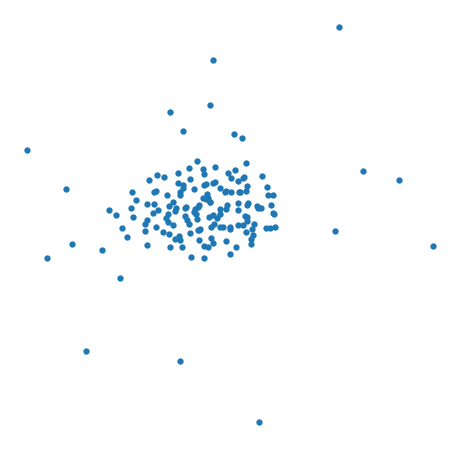

In [0]:
palette = np.array(sns.color_palette("hls", 2))
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(tsne_results[:,0], tsne_results[:,1], lw=0, s=40)
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')